In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
BASE_PATH="/mnt/Archivos/dataset-xray"

In [7]:
import cv2
from covidframe.tools.load import load_database
from pathlib import Path

In [10]:
base_dir = Path(BASE_PATH)
DEFAULT_DATABASE_NAME = "database_clean_balanced.metadata.csv"

In [11]:
filename_path = base_dir / DEFAULT_DATABASE_NAME

In [12]:
df = load_database(filename=filename_path)

In [13]:
df

,image_path,image_name,original_category,id,category,type,source,folder_name,cv_hash,im_hash,original_image_path,original_image_name
0,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_COVID-88.png,COVID,COVID-88,covid-19,folders-metadata,kaggle,COVID-19_Radiography_Dataset,1094107584115853582,0100e04dab5fd25481862a46598497157375bd026ff31a...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,COVID-88.png
1,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_COVID-3154.png,COVID,COVID-3154,covid-19,folders-metadata,kaggle,COVID-19_Radiography_Dataset,5704140213017193230,6ec2e4002fd61b00f9c0b85e2937ad2eecf29d8b051618...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,COVID-3154.png
2,/mnt/Archivos/dataset-xray/database_clean/covi...,covid-chestxray-dataset_41379_2020_536_Fig2_HT...,Pneumonia/Viral/COVID-19,326a,covid-19,metadata,github,covid-chestxray-dataset,1085171012358187790,95e949cc2f67170b66eaf0cea23dd8d7a90e1b0a148f4f...,/mnt/Archivos/dataset-xray/covid-chestxray-dat...,41379_2020_536_Fig2_HTML-c1.png
3,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_COVID-3291.png,COVID,COVID-3291,covid-19,folders-metadata,kaggle,COVID-19_Radiography_Dataset,940210450638063909,195bcdce1cf54c2f674635832c59c6a1abec9e5a60e011...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,COVID-3291.png
4,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_COVID-2579.png,COVID,COVID-2579,covid-19,folders-metadata,kaggle,COVID-19_Radiography_Dataset,508639891331836685,520f073f15c7723416ff23fe5599a355d44733fda0c384...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,COVID-2579.png
...,...,...,...,...,...,...,...,...,...,...,...,...
12160,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_Lung_Opacity-5049...,Lung_Opacity,Lung_Opacity-5049,pneumonia,folders-metadata,kaggle,COVID-19_Radiography_Dataset,1085102585000169356,88e1e702d124c2c27b2112881ecbd4ecb654f688b9a8e6...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,Lung_Opacity-5049.png
12161,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_Lung_Opacity-435.png,Lung_Opacity,Lung_Opacity-435,pneumonia,folders-metadata,kaggle,COVID-19_Radiography_Dataset,795742183592053004,51e11a0116c94aa6d26b6d73b775a715b1418f4d357f93...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,Lung_Opacity-435.png
12162,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_Lung_Opacity-2025...,Lung_Opacity,Lung_Opacity-2025,pneumonia,folders-metadata,kaggle,COVID-19_Radiography_Dataset,508710275183929673,ac1369c1ffa1601eb1436109183b5cade0adc27e5519a3...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,Lung_Opacity-2025.png
12163,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_Lung_Opacity-3013...,Lung_Opacity,Lung_Opacity-3013,pneumonia,folders-metadata,kaggle,COVID-19_Radiography_Dataset,217020528360754958,e0f1ccfbf8d1a3fd7e0ef322885fff6ebd4b7ced34d336...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,Lung_Opacity-3013.png


In [15]:
test_image = df["image_path"][0]
test_image

'/mnt/Archivos/dataset-xray/database_clean/COVID-19_Radiography_Dataset_COVID-88.png'

In [32]:
import matplotlib.pylab as plt
from covidframe.tools.image import load_image, load_image_list

In [29]:
x = load_image(test_image)

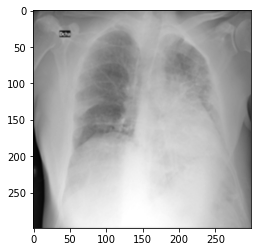

In [30]:
plt.imshow(x, cmap = 'gray', interpolation = 'bicubic')

In [31]:
x.shape

(299, 299)

In [37]:
im_arr = load_image_list(df["image_path"][0:16])

In [38]:
from covidframe.plot.image import plot_images

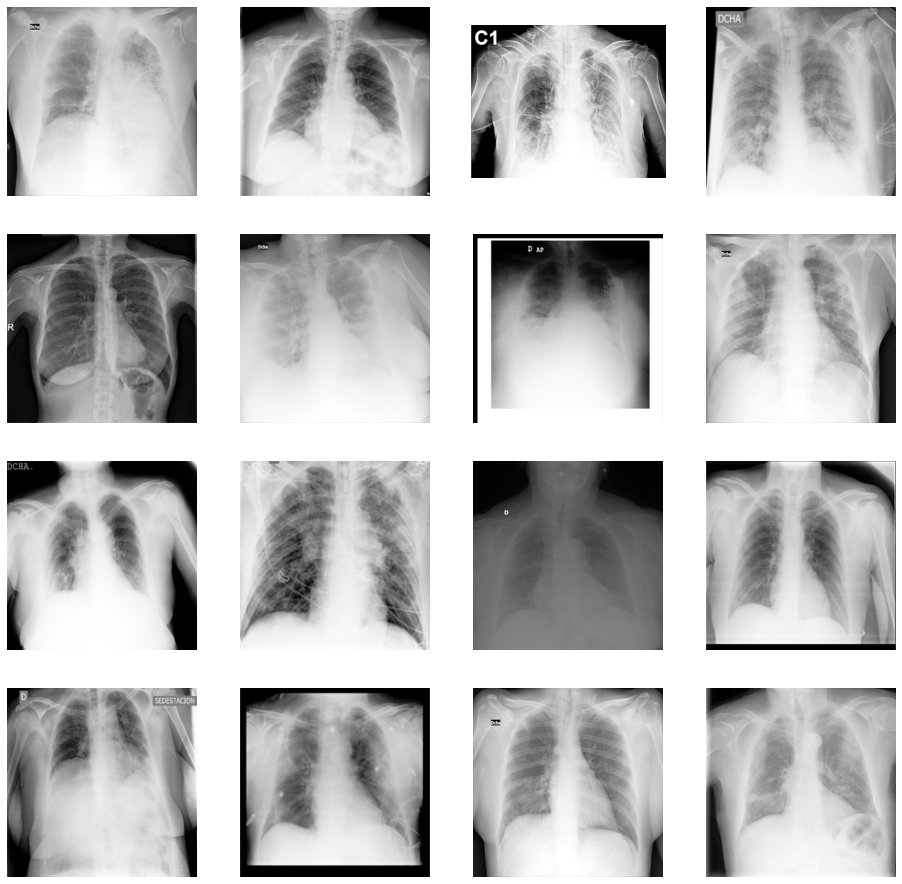

In [40]:
plot_images(im_arr,4)

In [41]:
im_arr_covid = load_image_list(df[df["category"]=="covid-19"]["image_path"][0:16])

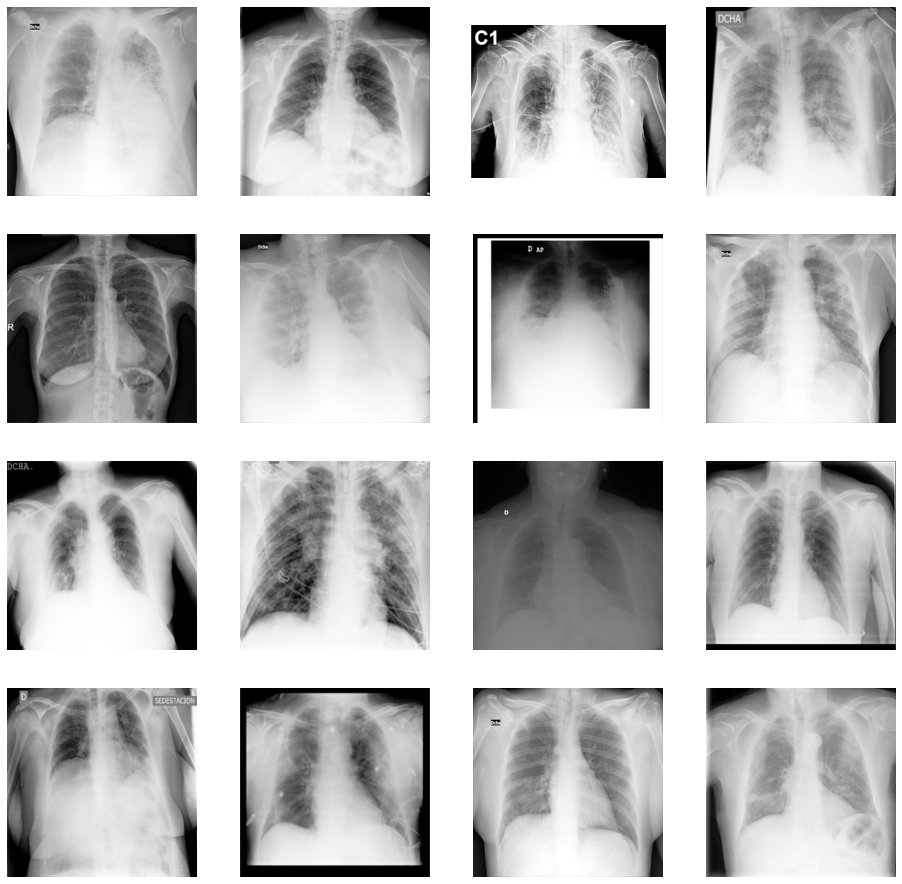

In [45]:
plot_images(im_arr_covid,4)

In [43]:
im_arr_normal = load_image_list(df[df["category"]=="normal"]["image_path"][0:16])

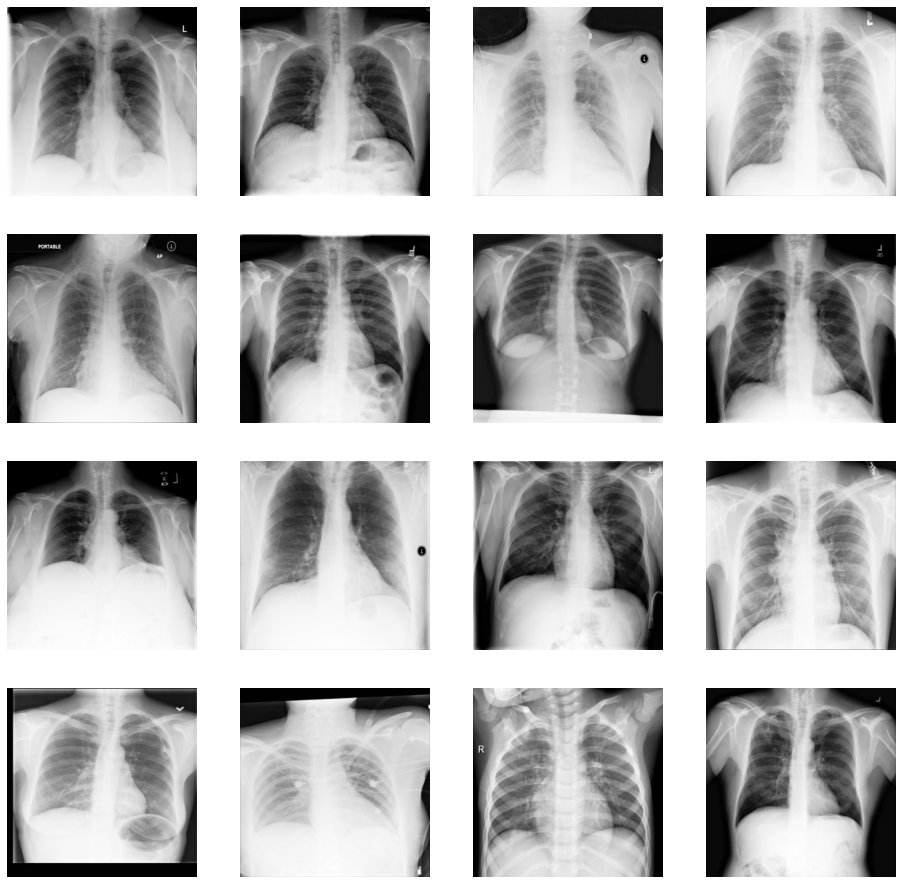

In [46]:
plot_images(im_arr_normal,4)

In [50]:
from covidframe.preprocess.equalization import apply_equalization, apply_equalization_to_array

In [69]:
arr_eq_normal = apply_equalization_to_array(im_arr_normal, type_equalization="simple")

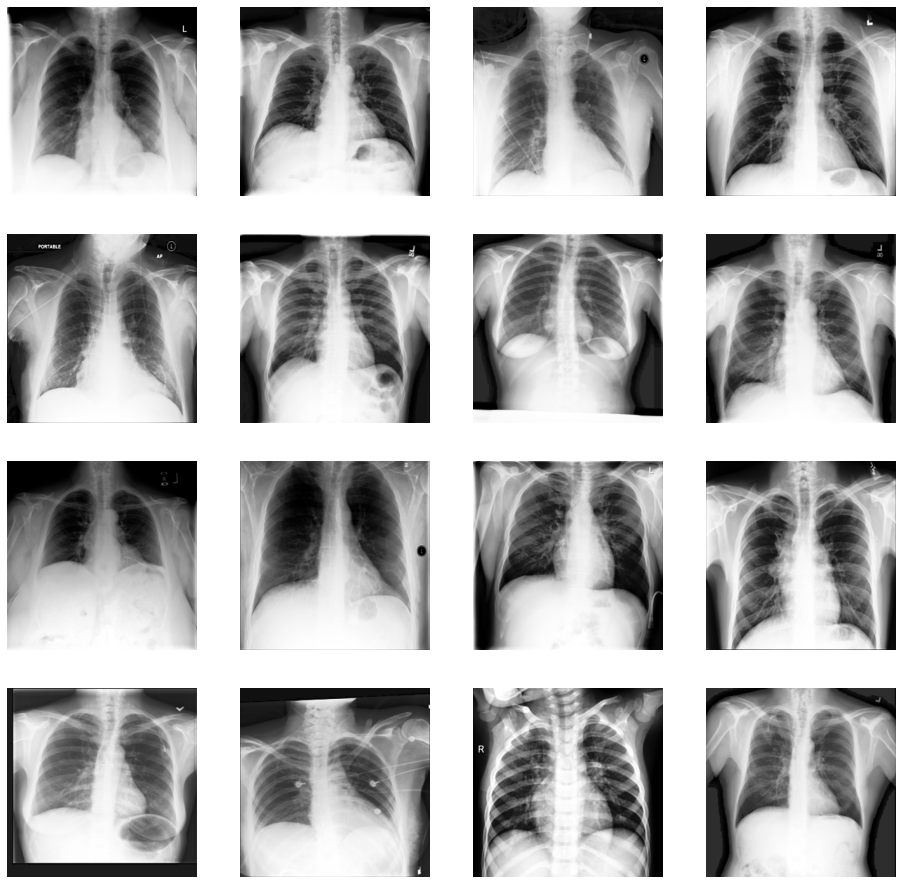

In [55]:
plot_images(arr_eq_normal,4)

In [73]:
arr_eqc_normal = apply_equalization_to_array(im_arr_normal, type_equalization="clahe", clip_limit=0.1,
                                            tile_size=16)

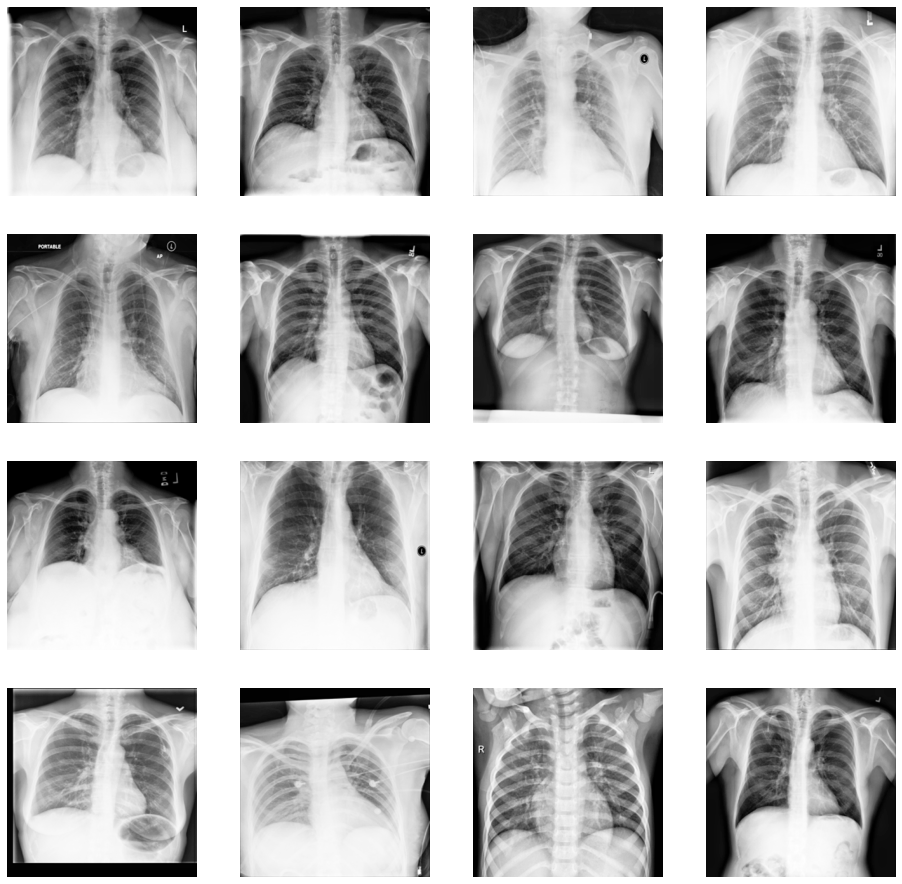

In [74]:
plot_images(arr_eqc_normal,4)

In [64]:
from covidframe.plot.image import plot_image_and_histogram

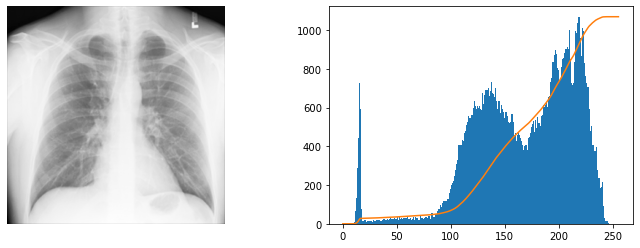

In [71]:
plot_image_and_histogram(im_arr_normal[3])

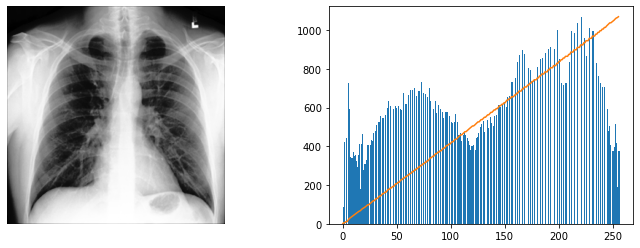

In [72]:
plot_image_and_histogram(arr_eq_normal[3])

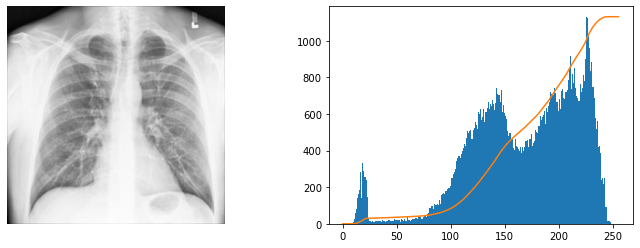

In [75]:
plot_image_and_histogram(arr_eqc_normal[3])